- ID: ID duy nhất cho mỗi hồ sơ.
- KIDSDRIV: Số lượng trẻ em lái xe.
- BIRTH: Ngày sinh của người đóng bảo hiểm.
- AGE: Tuổi của người đóng bảo hiểm.
- HOMEKIDS: Số lượng trẻ em ở nhà.
- YOJ: Số năm kinh nghiệm lái xe của người đóng bảo hiểm.
- INCOME: Thu nhập của người đóng bảo hiểm.
- PARENT1: Biến đánh dấu liệu người đóng bảo hiểm có là phụ huynh không.
- HOME_VAL: Giá trị nhà của người đóng bảo hiểm.
- MSTATUS: Tình trạng hôn nhân.
- GENDER: Giới tính của người đóng bảo hiểm.
- EDUCATION: Trình độ học vấn của người đóng bảo hiểm.
- OCCUPATION: Nghề nghiệp của người đóng bảo hiểm.
- TRAVTIME: Thời gian di chuyển hàng ngày.
- CAR_USE: Mục đích sử dụng xe hơi.
- BLUEBOOK: Giá trị xe hơi.
- TIF: Thời gian sử dụng bảo hiểm.
- CAR_TYPE: Loại xe hơi.
- RED_CAR: Biến đánh dấu liệu có sử dụng xe màu đỏ không.
- OLDCLAIM: Số tiền đền bù từ các yêu cầu trước đây.
- CLM_FREQ: Số lần yêu cầu bồi thường trước đó.
- REVOKED: Biến đánh dấu liệu đã thu hồi bằng lái xe chưa.
- MVR_PTS: Điểm trên lệnh vi phạm giao thông.
- CLM_AMT: Số tiền đã yêu cầu bồi thường.
- CAR_AGE: Tuổi của xe hơi.
- CLAIM_FLAG: Biến đánh dấu liệu có yêu cầu bồi thường không.
- URBANICITY: Đô thị hoặc nông thôn.
Đô thị hoặc nông thôn.





In [2]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        
        sys.path.remove(lib)
    sys.path.insert(0,lib)


d:\ads_test


In [3]:
from libs.lib import *

init_notebook_mode(connected=True)
print(tf.__version__) # requires version >= 1.9.0

2.13.0


In [4]:
exps_dir = "../../exps/exp3"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/data"
os.makedirs(save_dir, exist_ok=True)


In [4]:
data = pd.read_csv("../../data/car_insurance_claim.csv")
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [5]:
data.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [7]:
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [8]:
data.tail()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban
10301,680381960,0,27FEB47,52.0,0,11.0,"$53,235",No,"$197,017",Yes,...,Minivan,no,$0,0,No,0,$0,9.0,0,z_Highly Rural/ Rural


In [9]:
data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [10]:
data.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

**Qua kiểm tra, ta dễ dàng nhận ra có 5 cột bị khuyết thiếu dữ liệu là cột "YOJ","INCOME","HOME_VAL","OCCUPATION","CAR_AGE".**

In [11]:
data.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [12]:
data['BIRTH'] = pd.to_datetime(data['BIRTH'], format='%d%b%y')
data.ID = data.ID.astype('category')
data


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,2039-03-16,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,2056-01-21,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,2051-11-18,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,2064-03-05,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,2048-06-05,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,2054-08-13,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,2053-06-17,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,2051-06-18,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,2048-12-12,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [13]:
data.duplicated().sum()

1

**Nhóm phát hiện có một dòng trùng dữ liệu.**

In [14]:
data_duplicated = data[data.duplicated()]
data_duplicated

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
9801,279799481,0,2060-02-21,39.0,0,14.0,"$93,077",No,"$244,764",Yes,...,Minivan,yes,$0,0,No,0,$0,1.0,0,z_Highly Rural/ Rural


In [15]:
data.drop_duplicates(inplace=True)

In [16]:
numeric_columns = list(data.select_dtypes(['number']).columns)
object_columns = list(data.select_dtypes(['object']).columns)


In [17]:
change_tocategory = [i for i in numeric_columns if len(data[i].unique())<=10]
data[change_tocategory] = data[change_tocategory].astype('category')



In [18]:
object_columns = list(data.select_dtypes(['object']).columns)
len(object_columns)
numeric_columns = list(data.select_dtypes(['number']).columns)
len(numeric_columns)
print(f"Biến phân loại : {len(object_columns)}, Biến liên tục : {len(numeric_columns)}")

Biến phân loại : 15, Biến liên tục : 6


In [19]:
data[object_columns] = data[object_columns].astype('category')
object_columns = list(data.select_dtypes(['category']).columns)


In [20]:
data[object_columns].describe()

,ID,KIDSDRIV,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,CLM_AMT,CLAIM_FLAG,URBANICITY
count,10301,10301,10301,9731,10301,9726,10301,10301,10301,9636,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301
unique,8753,5,6,8151,2,6334,2,2,5,8,2,2985,6,2,3545,6,2,2346,2,2
top,173124759,0,0,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,Private,"$1,500",z_SUV,no,$0,0,No,$0,0,Highly Urban/ Urban
freq,5,9068,6693,797,8958,2908,6187,5545,2952,2288,6512,207,2883,7326,6291,6291,9040,7555,7555,8230


In [21]:
data[numeric_columns].describe()

,AGE,YOJ,TRAVTIME,TIF,MVR_PTS,CAR_AGE
count,10294.000000,9753.000000,10301.000000,10301.000000,10301.000000,9662.000000
mean,44.837964,10.473700,33.416853,5.329580,1.710319,8.298903
std,8.606671,4.108999,15.870398,4.110773,2.159054,5.714263
min,16.000000,0.000000,5.000000,1.000000,0.000000,-3.000000
25%,39.000000,9.000000,22.000000,1.000000,0.000000,1.000000
50%,45.000000,11.000000,33.000000,4.000000,1.000000,8.000000
75%,51.000000,13.000000,44.000000,7.000000,3.000000,12.000000
max,81.000000,23.000000,142.000000,25.000000,13.000000,28.000000


In [22]:
for column in object_columns : 
    print("\033[1m","*,Column : ", column,"\033[0m")
    print('\t',len(data[column].unique()),"unique values","\t & \t",
        data[column].notnull().sum(), "non-null values\t",
        round(100* data[column].notnull().sum()/len(data[column]),2),
        "% non-null")
    if len (data[column].unique())<=10 :
        print('\t',data[column].unique())

 *,Column :  ID 
	 8753 unique values 	 & 	 10301 non-null values	 100.0 % non-null
 *,Column :  KIDSDRIV 
	 5 unique values 	 & 	 10301 non-null values	 100.0 % non-null
	 [0, 1, 2, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]
 *,Column :  HOMEKIDS 
	 6 unique values 	 & 	 10301 non-null values	 100.0 % non-null
	 [0, 1, 2, 3, 4, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]
 *,Column :  INCOME 
	 8152 unique values 	 & 	 9731 non-null values	 94.47 % non-null
 *,Column :  PARENT1 
	 2 unique values 	 & 	 10301 non-null values	 100.0 % non-null
	 ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
 *,Column :  HOME_VAL 
	 6335 unique values 	 & 	 9726 non-null values	 94.42 % non-null
 *,Column :  MSTATUS 
	 2 unique values 	 & 	 10301 non-null values	 100.0 % non-null
	 ['z_No', 'Yes']
Categories (2, object): ['Yes', 'z_No']
 *,Column :  GENDER 
	 2 unique values 	 & 	 10301 non-null values	 100.0 % non-null
	 ['M', 'z_F']
Categories (2, object): ['M', 'z_F']
 *,Column :  EDUCATION 
	

KẾT LUẬN 
- Dựa vào thống kê các biến mang tính duy nhất ở cột phân loại, chúng ta thấy có 1 cột mang tính chất phân loại có tác dụng như mã số, mỗi dòng là một số cột khác nhau => Không quá quan trọng trong bộ dữ liệu nên ta có thể bỏ nó.
- Ngoài ra, ta có thể quan sát thấy các dòng có ký tự đặc biệt "$" tượng trưng cho ký hiệu tiền tệ USD ở các cột "Income","Home_Val","BlueBook","Oldclaim" không phù hợp với mô hình dự đoán, ta biến đổi những biến này sang biến liên tục.
- Cuối cùng, một số cột có dữ liệu bị bỏ trống.

In [23]:
for column in object_columns :
    if len(data[column].unique())<=10:
        print("-"*100)
        print("*,Column: ",column)
        print(data[column].value_counts())
        print('-'*100)

----------------------------------------------------------------------------------------------------
*,Column:  KIDSDRIV
0    9068
1     804
2     351
3      74
4       4
Name: KIDSDRIV, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*,Column:  HOMEKIDS
0    6693
2    1427
1    1106
3     856
4     201
5      18
Name: HOMEKIDS, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*,Column:  PARENT1
No     8958
Yes    1343
Name: PARENT1, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*,Column:  MST

In [24]:
for column in object_columns:
    if len(data[column].unique())<=40:
        data[column].value_counts().iplot(kind='bar',title=column, 
                                        xTitle=column, 
                                        yTitle='Values')

In [25]:
numeric_columns

['AGE', 'YOJ', 'TRAVTIME', 'TIF', 'MVR_PTS', 'CAR_AGE']

In [26]:
for column in numeric_columns : 
    print("*, Column: ",column)
    print(len(data[column].unique()), "unique values","\t & \t",
        data[column].notnull().sum(), "non-null values\t",
        round(100* data[column].notnull().sum()/len(data[column]),2),
        "% nono-null")
    if len(data[column].unique())<=10:
        print(data[column].unique())

*, Column:  AGE
62 unique values 	 & 	 10294 non-null values	 99.93 % nono-null
*, Column:  YOJ
22 unique values 	 & 	 9753 non-null values	 94.68 % nono-null
*, Column:  TRAVTIME
100 unique values 	 & 	 10301 non-null values	 100.0 % nono-null
*, Column:  TIF
23 unique values 	 & 	 10301 non-null values	 100.0 % nono-null
*, Column:  MVR_PTS
14 unique values 	 & 	 10301 non-null values	 100.0 % nono-null
*, Column:  CAR_AGE
31 unique values 	 & 	 9662 non-null values	 93.8 % nono-null


KẾT LUẬN 
- Dù là kiểu dữ liệu số, nhưng một số cột thuộc kiểu dữ liệu rời rạc chứ không phải kiểu số liệu liên tục ( KIDSRIV, CLM_FREQ, CLAIM_FLAG,...) mang vai trò như một phân lớp. Chúng ta sẽ chuyển cột dữ liệu này sang kiểu dữ liệu mang tính phân loại để tăng hiệu suất dự án !
- Các biến rời rạc nhưng chiếm khá nhiều giá trị như tuổi nhóm sẽ xem xét chuyển sang cột phân loại như Young, Middle, Old để máy học tốt hơn.

In [27]:
change_tocategory = [i for i in numeric_columns if len(data[i].unique())<=10]
change_tocategory

[]

In [28]:
data[change_tocategory] = data[change_tocategory].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10301 non-null  category      
 1   KIDSDRIV    10301 non-null  category      
 2   BIRTH       10301 non-null  datetime64[ns]
 3   AGE         10294 non-null  float64       
 4   HOMEKIDS    10301 non-null  category      
 5   YOJ         9753 non-null   float64       
 6   INCOME      9731 non-null   category      
 7   PARENT1     10301 non-null  category      
 8   HOME_VAL    9726 non-null   category      
 9   MSTATUS     10301 non-null  category      
 10  GENDER      10301 non-null  category      
 11  EDUCATION   10301 non-null  category      
 12  OCCUPATION  9636 non-null   category      
 13  TRAVTIME    10301 non-null  int64         
 14  CAR_USE     10301 non-null  category      
 15  BLUEBOOK    10301 non-null  category      
 16  TIF         10301 non-

In [29]:
# Hàm chuyển đổi giá trị tiền tệ
def convert_money(x):
    if isinstance(x, str):
        # Loại bỏ dấu "$" và dấu phẩy từ chuỗi và chuyển đổi thành số
        return float(x.replace("$", "").replace(",", ""))
    elif isinstance(x, (int, float)):
        # Trả về giá trị ban đầu nếu đã là số
        return x
    else:
        # Trả về NaN cho các giá trị không phải là số hoặc NaN
        return np.nan


In [30]:
cols=['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
for col in cols:
    data[col] = data[col].apply(convert_money)


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10301 non-null  category      
 1   KIDSDRIV    10301 non-null  category      
 2   BIRTH       10301 non-null  datetime64[ns]
 3   AGE         10294 non-null  float64       
 4   HOMEKIDS    10301 non-null  category      
 5   YOJ         9753 non-null   float64       
 6   INCOME      9731 non-null   category      
 7   PARENT1     10301 non-null  category      
 8   HOME_VAL    9726 non-null   category      
 9   MSTATUS     10301 non-null  category      
 10  GENDER      10301 non-null  category      
 11  EDUCATION   10301 non-null  category      
 12  OCCUPATION  9636 non-null   category      
 13  TRAVTIME    10301 non-null  int64         
 14  CAR_USE     10301 non-null  category      
 15  BLUEBOOK    10301 non-null  category      
 16  TIF         10301 non-

In [32]:
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,2039-03-16,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,2056-01-21,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,2051-11-18,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,2064-03-05,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,2048-06-05,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,2054-08-13,45.0,2,9.0,164669.0,No,386273.0,Yes,...,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10298,61970712,0,2053-06-17,46.0,0,9.0,107204.0,No,332591.0,Yes,...,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,849208064,0,2051-06-18,48.0,0,15.0,39837.0,No,170611.0,Yes,...,z_SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10300,627828331,0,2048-12-12,50.0,0,7.0,43445.0,No,149248.0,Yes,...,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


KẾT LUẬN
- Nhóm đã tiến hành chuyển đổi các cột có kí hiệu $ thành cột mới và đổi qua biến liên tục.

In [33]:
object_columns

['ID',
 'KIDSDRIV',
 'HOMEKIDS',
 'INCOME',
 'PARENT1',
 'HOME_VAL',
 'MSTATUS',
 'GENDER',
 'EDUCATION',
 'OCCUPATION',
 'CAR_USE',
 'BLUEBOOK',
 'CAR_TYPE',
 'RED_CAR',
 'OLDCLAIM',
 'CLM_FREQ',
 'REVOKED',
 'CLM_AMT',
 'CLAIM_FLAG',
 'URBANICITY']

In [34]:
numeric_columns=list(data.select_dtypes('number'))
numeric_columns

['AGE', 'YOJ', 'TRAVTIME', 'TIF', 'MVR_PTS', 'CAR_AGE']

In [35]:
nulldata_numeric =(data[numeric_columns]==0).sum()
nulldata_numeric

AGE            0
YOJ          807
TRAVTIME       0
TIF            0
MVR_PTS     4657
CAR_AGE        4
dtype: int64

In [36]:
for c in numeric_columns:
    data[c].iplot(kind='hist',title=c,xTitle=c)
    plt.show()

In [37]:
for c in numeric_columns:
    data[c].iplot(kind='box',title=c,xTitle=c,boxpoints='outliers')
    plt.show()

In [38]:
def check_outliers(name,outliers_list):
    we=data[name].values
    Q1=np.quantile(we,0.25)
    Q3=np.quantile(we,0.75)
    IQR=Q3-Q1
    print("Q1: ",Q1,"Q3: ",Q3,"IQR:",IQR)
    outliers=np.unique(we[[(n<Q1-1.5*IQR)|(n>Q3+1.5*IQR) for n in we]])
    indexes=[we.tolist().index(i) for i in outliers]
    if len(indexes)>0:
        outliers_list.append(name)
    print("Indexes of outliers: ", indexes)
    print("Number of outliers: ", len(indexes))
    print("Outlier values", we[indexes])
    print("-----")

In [39]:
outliers_list=[]
for col in numeric_columns:
    check_outliers(col,outliers_list)
print(outliers_list)

Q1:  nan Q3:  nan IQR: nan
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  nan Q3:  nan IQR: nan
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  22.0 Q3:  44.0 IQR: 22.0
Indexes of outliers:  [764, 658, 1909, 260, 3345, 272, 314, 4177, 1663, 1724, 1069, 7727, 1262, 10016, 7301, 3233, 4924, 9072, 2261, 4685, 10132, 8719, 6335, 1771, 3415, 7495, 4318]
Number of outliers:  27
Outlier values [ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  95  97
  98  99 101 103 105 113 124 134 142]
-----
Q1:  1.0 Q3:  7.0 IQR: 6.0
Indexes of outliers:  [33, 57, 1102, 762, 924, 865, 1631]
Number of outliers:  7
Outlier values [17 18 19 20 21 22 25]
-----
Q1:  0.0 Q3:  3.0 IQR: 3.0
Indexes of outliers:  [75, 306, 10, 2240, 9591, 60]
Number of outliers:  6
Outlier values [ 8  9 10 11 12 13]
-----
Q1:  nan Q3:  nan IQR: nan
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
['TRAVTIME', 'TIF', 'MVR_PTS']


KẾT LUẬN 
- Một số cột chứ rất nhiều giá trị ngoại lệ. Cần phải cân nhắc

In [40]:
corrle = data[numeric_columns].corr()
corrle

,AGE,YOJ,TRAVTIME,TIF,MVR_PTS,CAR_AGE
AGE,1.000000,0.140946,-0.001587,-0.001960,-0.075788,0.178522
YOJ,0.140946,1.000000,-0.017128,0.024016,-0.041526,0.064812
TRAVTIME,-0.001587,-0.017128,1.000000,-0.013357,0.009673,-0.033330
TIF,-0.001960,0.024016,-0.013357,1.000000,-0.031247,0.007759
MVR_PTS,-0.075788,-0.041526,0.009673,-0.031247,1.000000,-0.034007
CAR_AGE,0.178522,0.064812,-0.033330,0.007759,-0.034007,1.000000


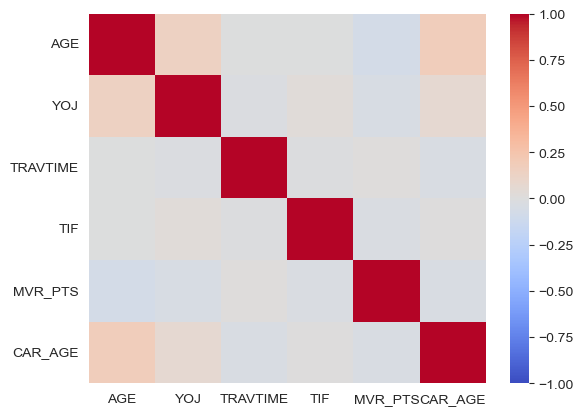

In [41]:
sns.heatmap(corrle, vmin=-1,vmax=1, annot=False,fmt=".2f",cmap='coolwarm')
plt.show()

KẾT LUẬN
- Dựa vào ma trận tương quan trên, ta nhận thấy những biến có tương quan mạnh : Income_converted & Home_val_converted (0.578943),Income_converted & car_age (0.417301), Home_val_converted & car_age (0.223198).
- Hầu như các biến không tương quan với nhau.

In [42]:
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,2039-03-16,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,2056-01-21,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,2051-11-18,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,2064-03-05,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,2048-06-05,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,2054-08-13,45.0,2,9.0,164669.0,No,386273.0,Yes,...,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10298,61970712,0,2053-06-17,46.0,0,9.0,107204.0,No,332591.0,Yes,...,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,849208064,0,2051-06-18,48.0,0,15.0,39837.0,No,170611.0,Yes,...,z_SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10300,627828331,0,2048-12-12,50.0,0,7.0,43445.0,No,149248.0,Yes,...,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


## **Chỉnh sửa dữ liệu**

- Sau những phân tích trên, chúng ta sẽ tiến hành chỉnh sử data theo kết luận trước đó

In [43]:
bins = [16,30,60,81]
labels=['Young','Middle','Old']
data['AGE'] = pd.cut(data.AGE, bins=bins,labels=labels, right=False)
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,2039-03-16,Old,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,2056-01-21,Middle,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,2051-11-18,Middle,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,2064-03-05,Middle,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,2048-06-05,Middle,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,2054-08-13,Middle,2,9.0,164669.0,No,386273.0,Yes,...,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10298,61970712,0,2053-06-17,Middle,0,9.0,107204.0,No,332591.0,Yes,...,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,849208064,0,2051-06-18,Middle,0,15.0,39837.0,No,170611.0,Yes,...,z_SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10300,627828331,0,2048-12-12,Middle,0,7.0,43445.0,No,149248.0,Yes,...,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


Chuyển các giá trị trong cột AGE thành giá trị phân loại : 
- Young : từ 16-30 tuổi
- Middle : từ 30-60 tuổi
- Old : từ 60-81 tuổi

In [44]:
data.describe()

,YOJ,TRAVTIME,TIF,MVR_PTS,CAR_AGE
count,9753.000000,10301.000000,10301.000000,10301.000000,9662.000000
mean,10.473700,33.416853,5.329580,1.710319,8.298903
std,4.108999,15.870398,4.110773,2.159054,5.714263
min,0.000000,5.000000,1.000000,0.000000,-3.000000
25%,9.000000,22.000000,1.000000,0.000000,1.000000
50%,11.000000,33.000000,4.000000,1.000000,8.000000
75%,13.000000,44.000000,7.000000,3.000000,12.000000
max,23.000000,142.000000,25.000000,13.000000,28.000000


In [45]:
data.CLAIM_FLAG.value_counts()

0    7555
1    2746
Name: CLAIM_FLAG, dtype: int64

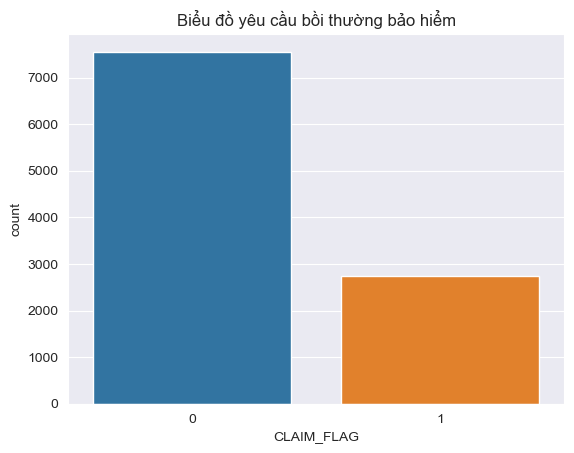

In [46]:
sns.countplot(x='CLAIM_FLAG',data=data)
plt.title("Biểu đồ yêu cầu bồi thường bảo hiểm")
plt.show()

## KẾT LUẬN
-Tỉ lệ hồ sơ yêu cầu bồi thường bảo hiểm có sự chênh lệch quá lớn. Số hồ sơ không yêu cầu bổi thường gấp 3 lần số hồ sơ yêu cầu bồi thường. => (Imbalanced variable)

In [47]:
data.shape

(10301, 27)

In [48]:
data.AGE.value_counts()

Middle    9468
Old        428
Young      397
Name: AGE, dtype: int64

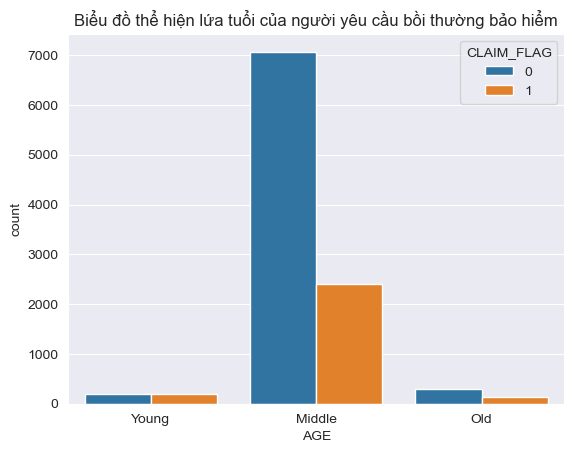

In [49]:
sns.countplot(x="AGE",hue="CLAIM_FLAG",data=data)
plt.title("Biểu đồ thể hiện lứa tuổi của người yêu cầu bồi thường bảo hiểm")
plt.show()

Sự tương quan giữa age không được hiển thị rõ rệt ở các nhóm tuổi bởi vốn dĩ tỉ lệ số hồ sơ được cho là không gian lận quá lớn, gấp 3 lần số bộ hồ sơ gian lận. Tuy nhiên, ta có thể nhận thấy được nhóm tuổi yêu cầu đòi bòi thường bảo hiểm nhiều nhất là ở nhóm tuổi trung niên (Middle).


In [50]:
data.OCCUPATION.value_counts()

z_Blue Collar    2288
Clerical         1590
Professional     1407
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

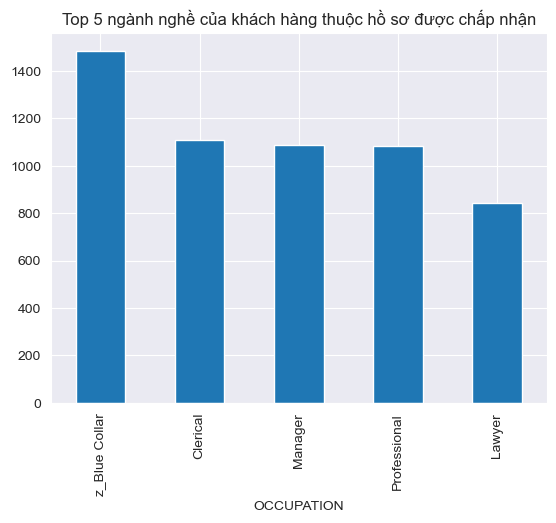

In [51]:
OCCUPATION_Y = data[data.CLAIM_FLAG==0].groupby('OCCUPATION')['CLAIM_FLAG'].count().sort_values(ascending=False)
OCCUPATION_Y.head(5).plot.bar()
plt.title('Top 5 ngành nghề của khách hàng thuộc hồ sơ được chấp nhận')
plt.show()

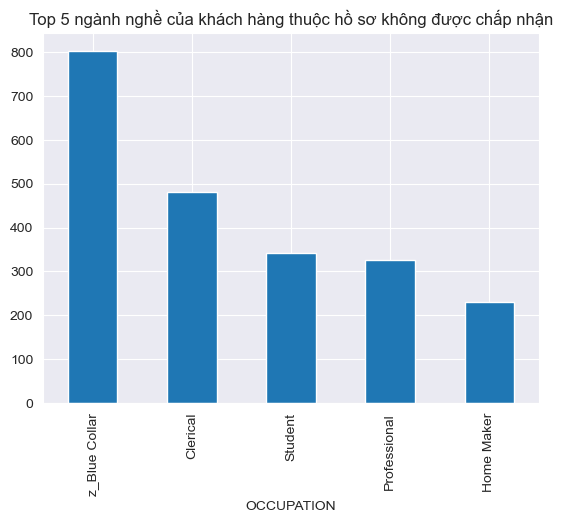

In [52]:
OCCUPATION_N = data[data.CLAIM_FLAG==1].groupby('OCCUPATION')['CLAIM_FLAG'].count().sort_values(ascending=False)
OCCUPATION_N.head(5).plot.bar()
plt.title('Top 5 ngành nghề của khách hàng thuộc hồ sơ không được chấp nhận')
plt.show()

## KẾT LUẬN
- Có thể thấy rõ sự khác nhau về nghề nghiệp của khách hàng giữa bộ hồ sơ gian lận với được chấp nhận.
- Chúng ta có thể cân nhắc đây là một đặc trưng đưa vào mô hình dự đoán!

In [53]:
available_request=data[data['CLAIM_FLAG']==1]

In [54]:
data.GENDER.value_counts()

z_F    5545
M      4756
Name: GENDER, dtype: int64

In [55]:
sns.histplot(data=data,x="HOME_VAL",hue="GENDER");
plt.title("Biểu đồ thể hiện tương quan giới tính với số giá trị nhà người nộp bảo hiểm")
plt.show()

In [1]:
g = sns.displot(data, x = 'HOME_VAL_converted', col= 'GENDER', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối giá trị nhà theo giới tính', y = 1.03)
g.set_ylabels('Số hóa đơn')
plt.show()

NameError: name 'sns' is not defined

<Axes: xlabel='CLAIM_FLAG', ylabel='count'>

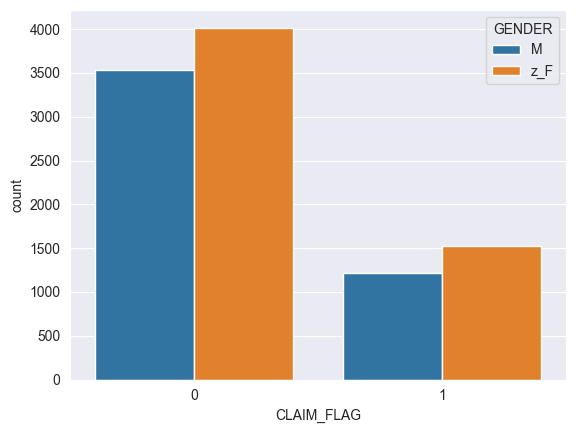

In [ ]:
sns.countplot(x='CLAIM_FLAG',hue='GENDER',data=data)

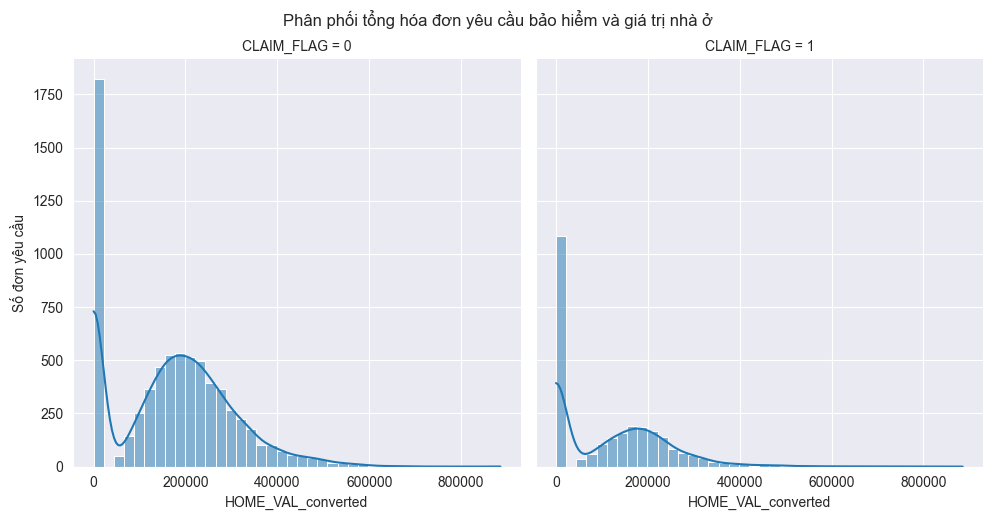

In [ ]:
g = sns.displot(data, x = 'HOME_VAL_converted', col= 'CLAIM_FLAG', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối tổng hóa đơn yêu cầu bảo hiểm và giá trị nhà ở', y = 1.03)
g.set_ylabels('Số đơn yêu cầu')
plt.show()

In [ ]:
data.to_excel(f'{exps_dir}/data/data_EDA.xlsx', index=None)
object_columns = list(data.select_dtypes(['object']).columns)
data[object_columns]=data[object_columns].astype('category')
category_columns = list(data.select_dtypes(['category']).columns)
numeric_columns = list(data.select_dtypes(['number']).columns)

np.savez(f'{save_dir}/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)
data.to_csv(f'{save_dir}/data_EDA.csv',index=None)